In [1]:
import vtk

In [2]:
from IPython.display import Image
def vtk_show(renderer, width=600, height=450):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.SetOffScreenRendering(1)
    renderWindow.AddRenderer(renderer)
    renderWindow.SetSize(width, height)
    renderWindow.Render()
     
    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()
     
    writer = vtk.vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = str(buffer(writer.GetResult()))
    
    return Image(data)

## Hola mundo

In [15]:
coneSource = vtk.vtkConeSource()
coneSource.SetResolution(10)

mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(coneSource.GetOutputPort())

actor = vtk.vtkActor()
actor.SetMapper(mapper)
 
renderer = vtk.vtkRenderer()
renderer.AddActor(actor)

renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)

renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)
 

renderWindow.Render()
renderWindowInteractor.Start()

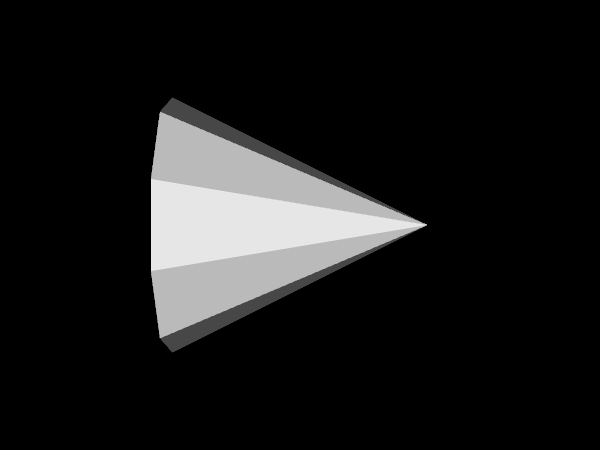

In [16]:
vtk_show(renderer)

## Ejercicio 1

![](ej01.png)

- Aumenta la resolución del cono hasta 20 caras
- Pinta el actor con SetDiffuseColor
- Rota el actor 30 grados en X, y -45 en Y
- Pon el background del renderer azul oscuro
- Aumenta el zoom de la ActiveCamera en 1.5

## Ejercicio 2

- Utiliza un Cilindro como Source
- Cambiando las propiedades de color del actor consigue una imágen como la siguiente

![](ej02.png)

## Ejercicio 3

- Cambia el estilo de interacción a 
```
vtkInteractorStyleTrackballCamera
```

- Añade un observer al interactor que escuche por 'LeftButtonPressEvent' y cambie el color del cilindro a uno aleatorio


## Ejercicio 4

![](ej04.png)

- Carga las posiciones, conexiones y radio de los átomos y píntalos todos como en la figura
- Crea un vtkPolyData y rellenalo con los datos leídos
    - SetPoints para los átomos
    - SetLines para las conexiones
    - GetPointData().SetScalars para los radios
- Combina vtkSphereSource y vtkGlyph3D para generar todas las esferas
- Colorea las esferas según su radio con vtkColorTransferFunction
- Pinta las conexiones con vtkTubeFilter
- Calcula el boundingBox con vtkOutlineFilter y píntalo junto con los demás actores
